In [2]:
import numpy as np               # linear algebra
import pandas as pd              # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns            #Statistical Data Visualization
import warnings
%pylab inline

import os

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

Populating the interactive namespace from numpy and matplotlib


In [3]:
donnees = pd.read_csv('Iris.csv')

In [4]:
donnees.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


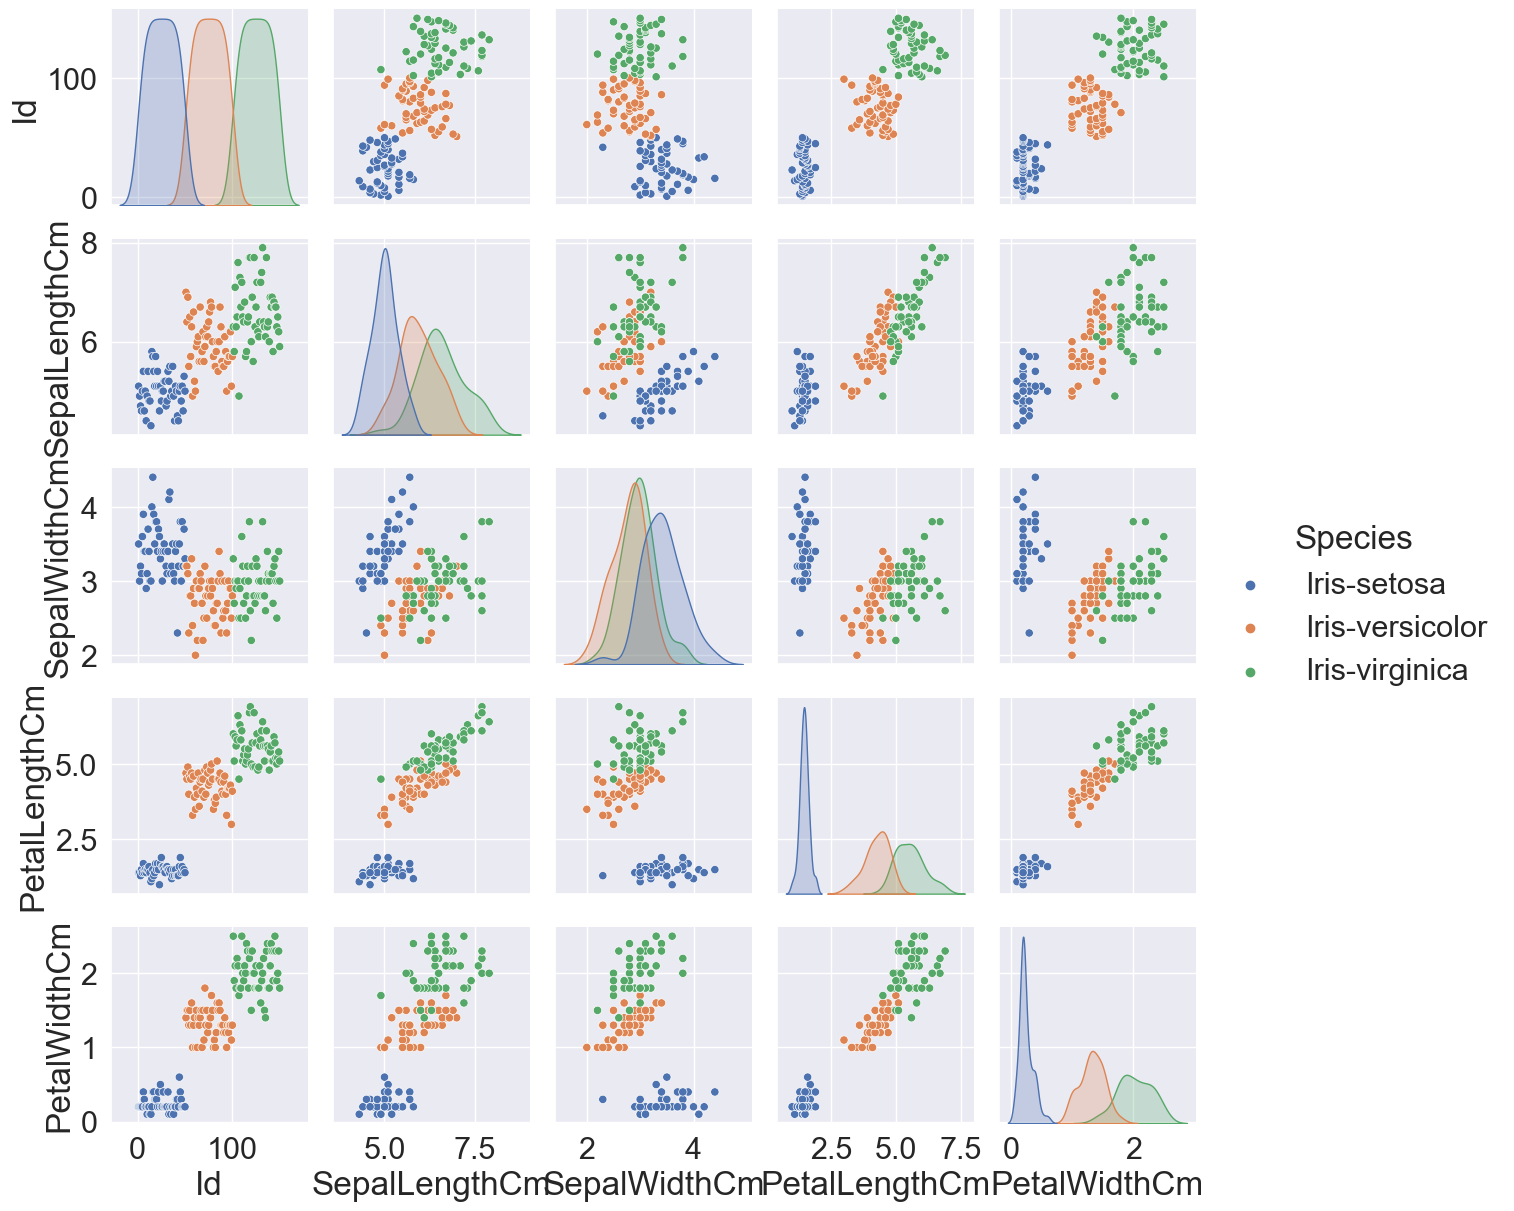

In [5]:
sns.pairplot(donnees, hue='Species', size=2.5);

# Classification ascendante hiérarchique

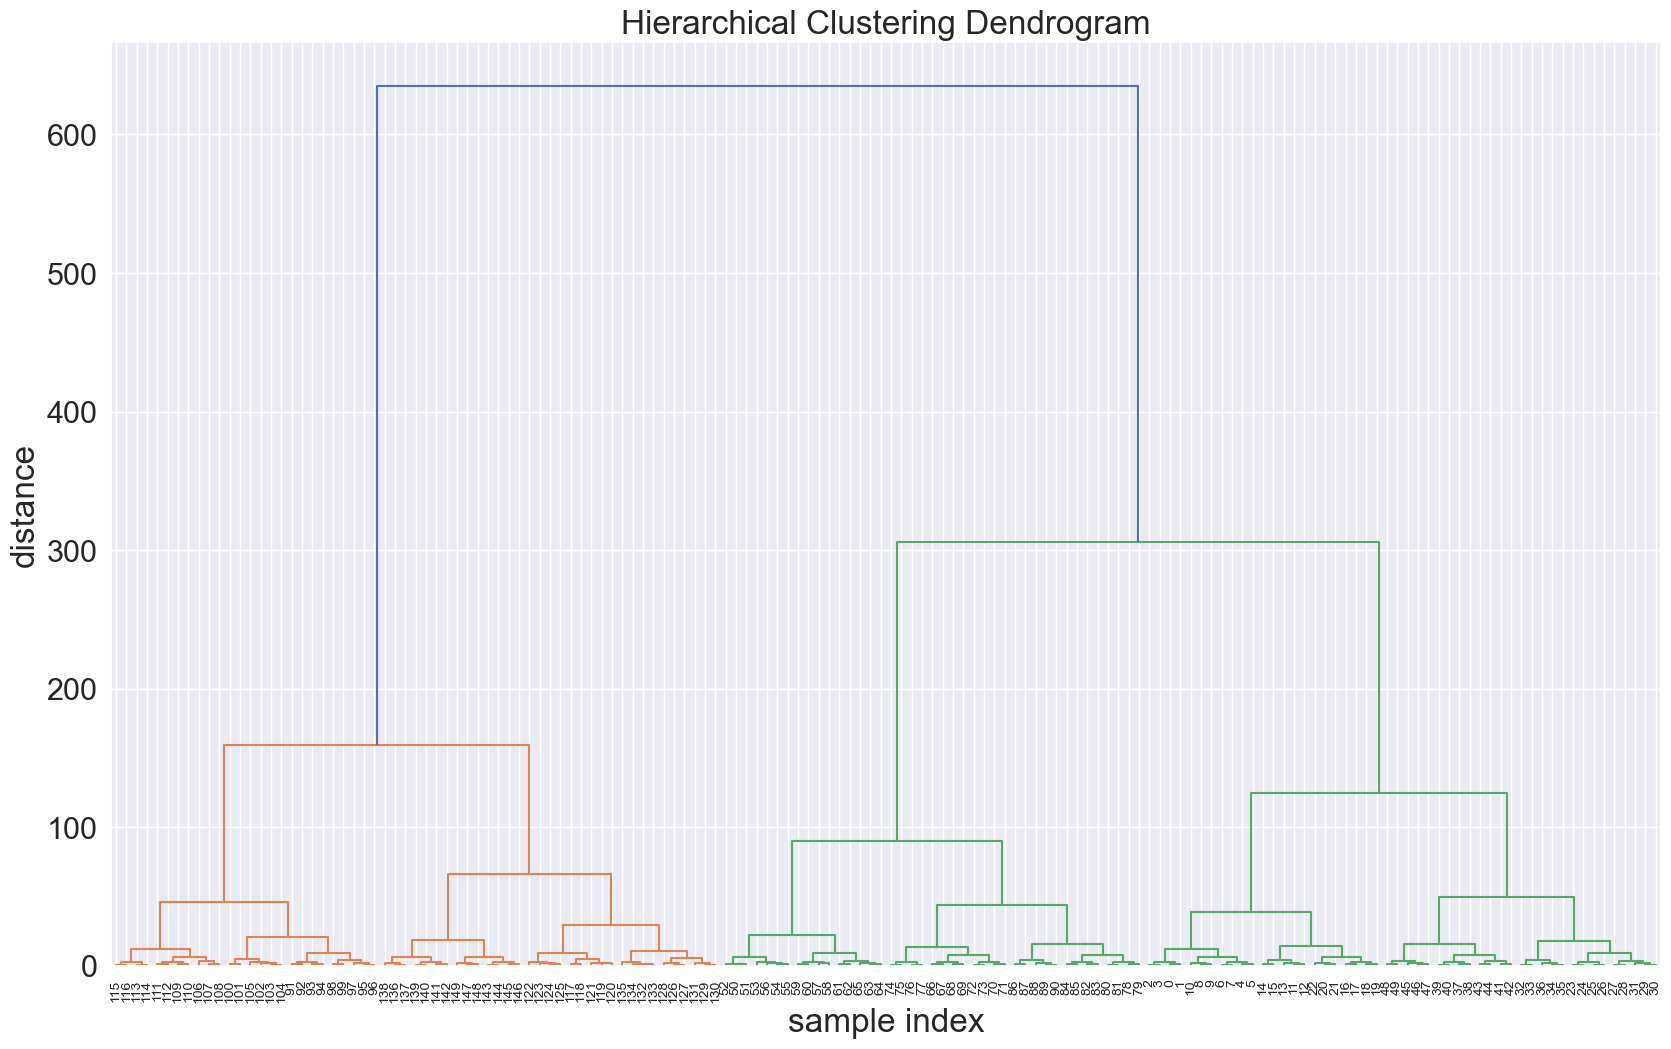

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(donnees.iloc[:,0:4], method='ward')
plt.figure(figsize=(20,12))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram( Z,leaf_rotation=90.,leaf_font_size=10.)
plt.show()

In [9]:
import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)
def afficheDendrogram(*args, **kwargs):
    font1 = fm.FontProperties(size=20)
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)', 
                  fontproperties=font2)
        plt.xlabel('sample index or (cluster size)', fontproperties=font1)
        plt.ylabel('distance', fontproperties=font1)
        plt.xticks(fontproperties=font1)
        plt.yticks(fontproperties=font1)
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center', fontproperties=font1)
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

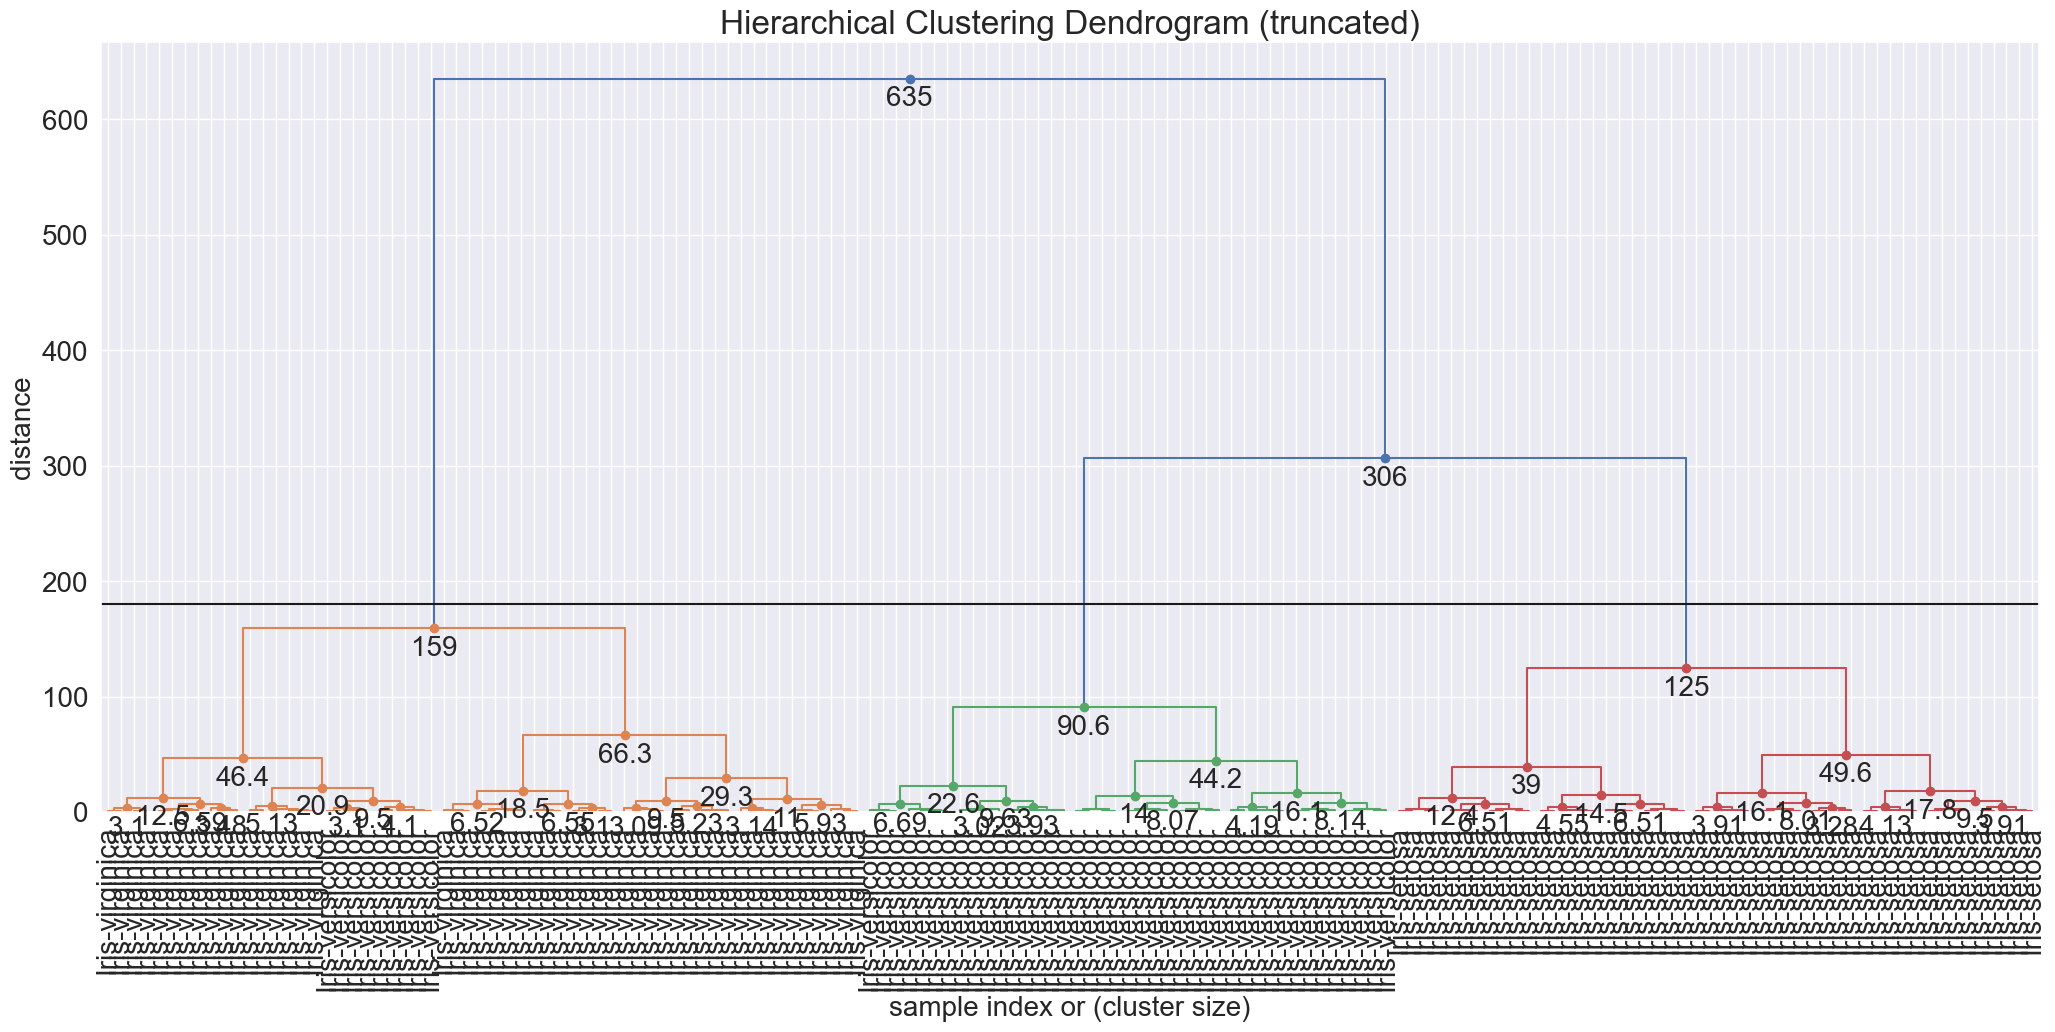

In [14]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=150,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=3,  # useful in small plots so annotations don't overlap
    max_d = 180,
    labels = donnees['Species'].values
)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6205786765196579


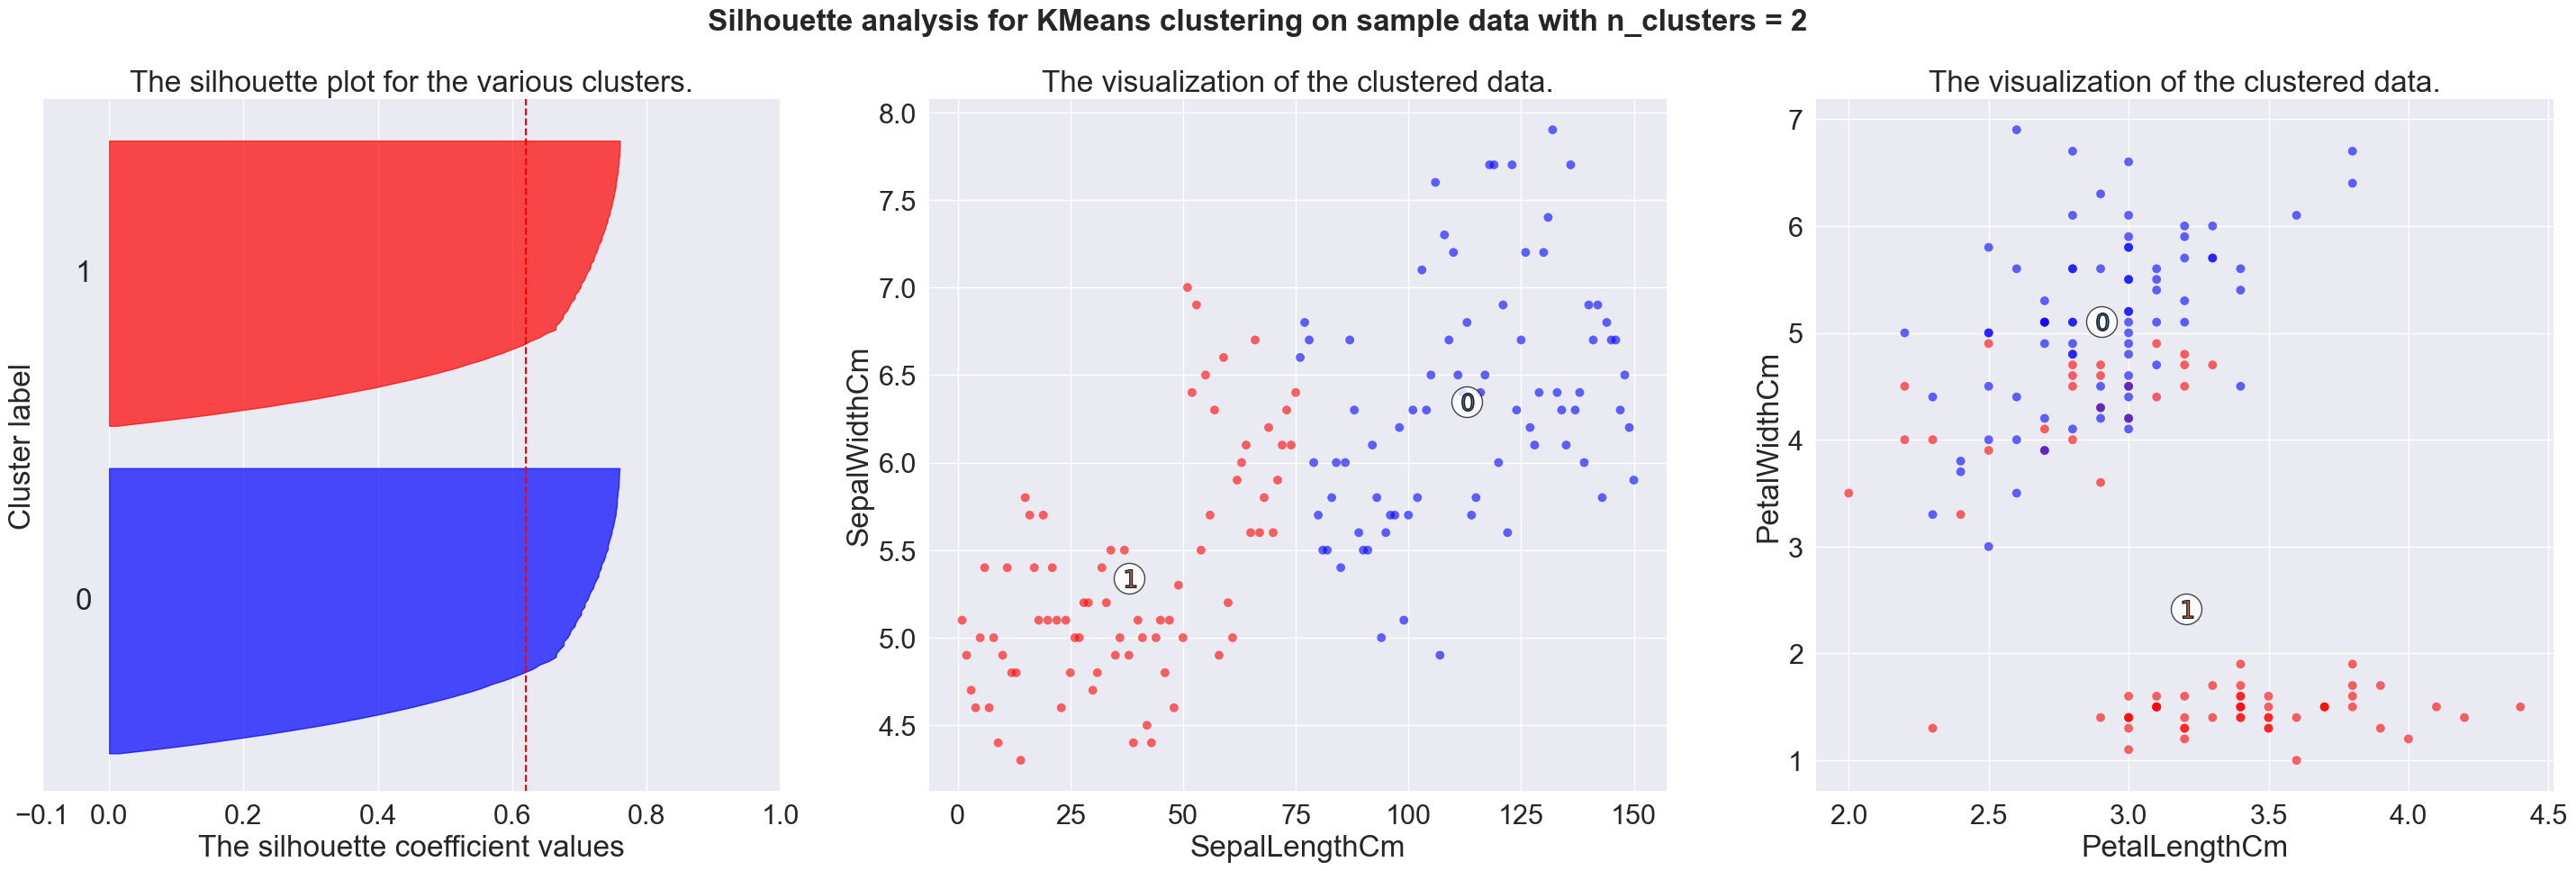

For n_clusters = 3 The average silhouette_score is : 0.5816174099799098


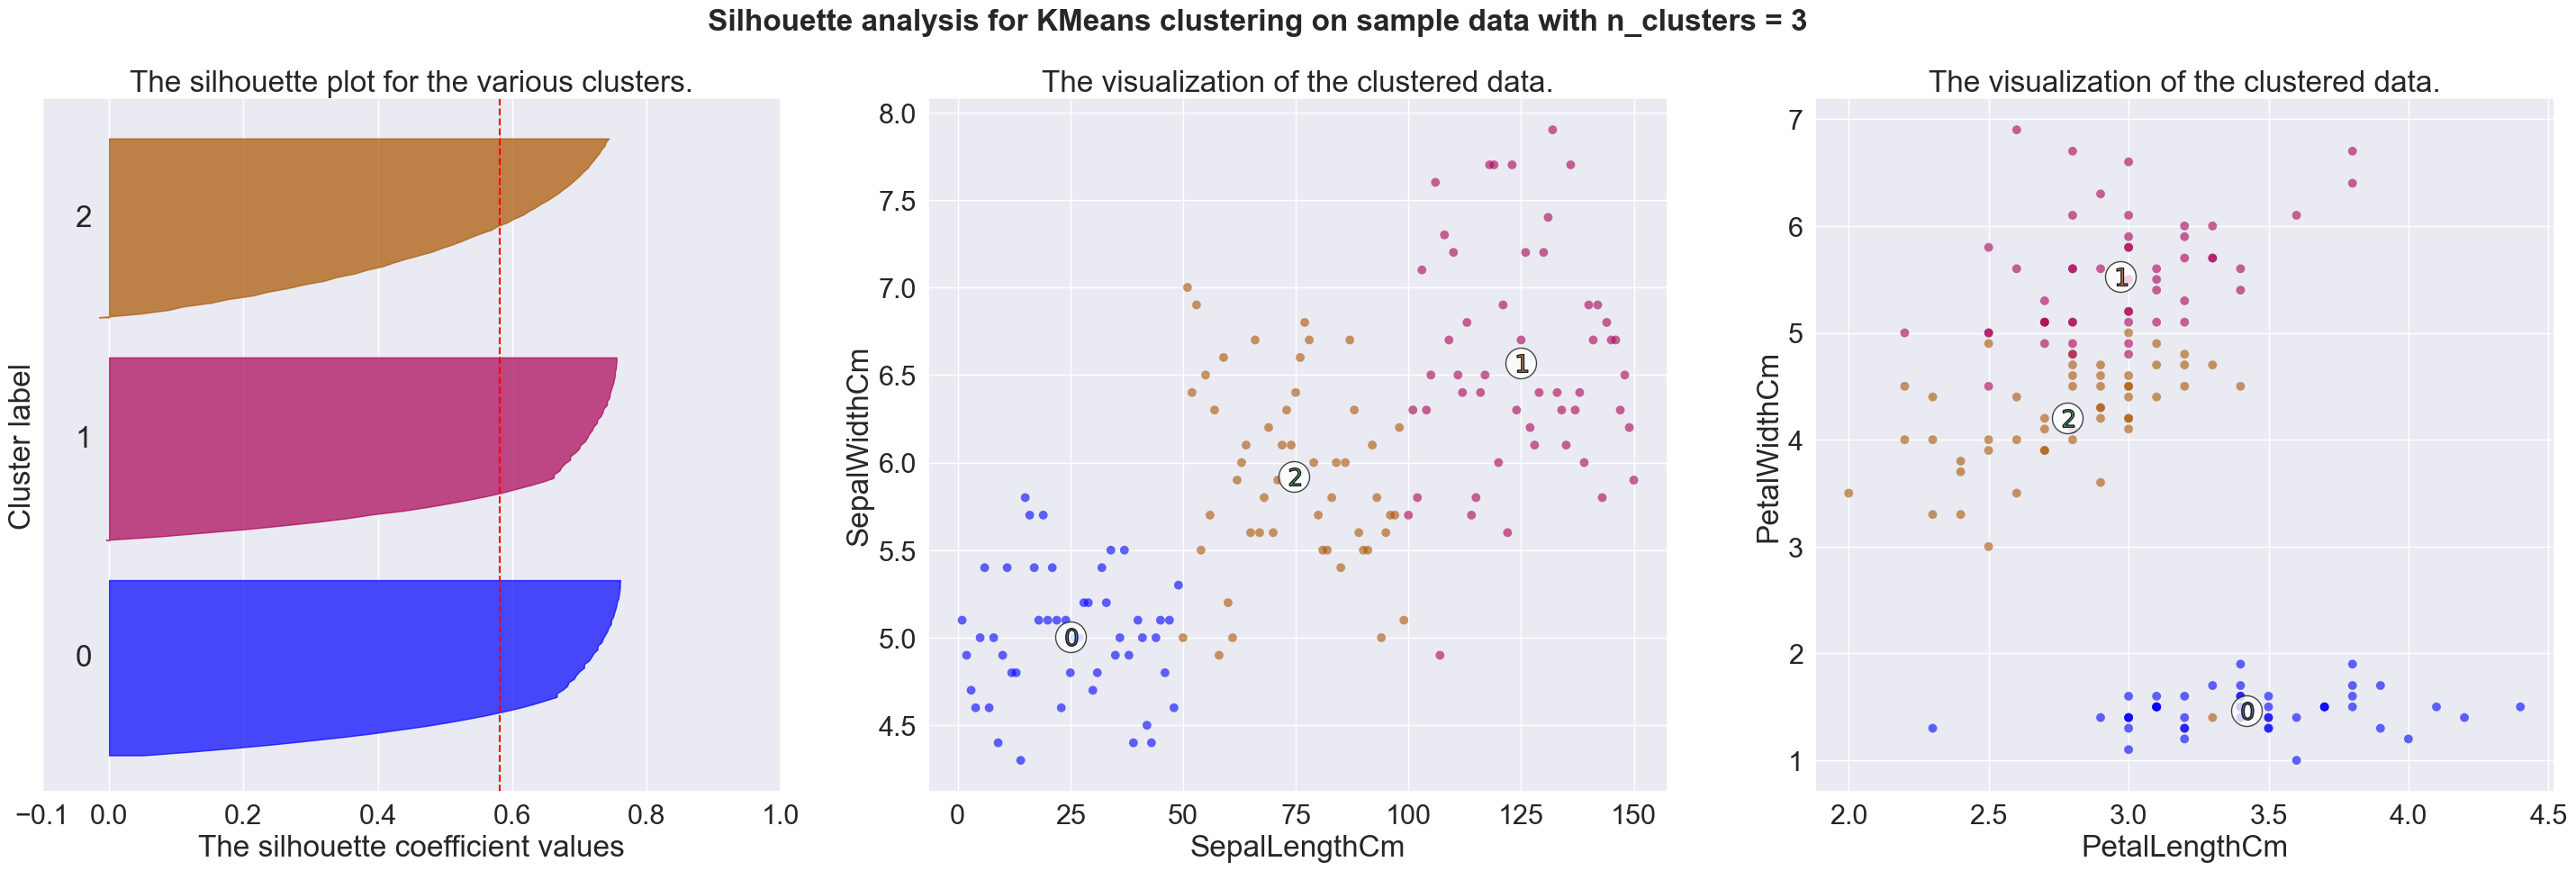

For n_clusters = 4 The average silhouette_score is : 0.5568746870637046


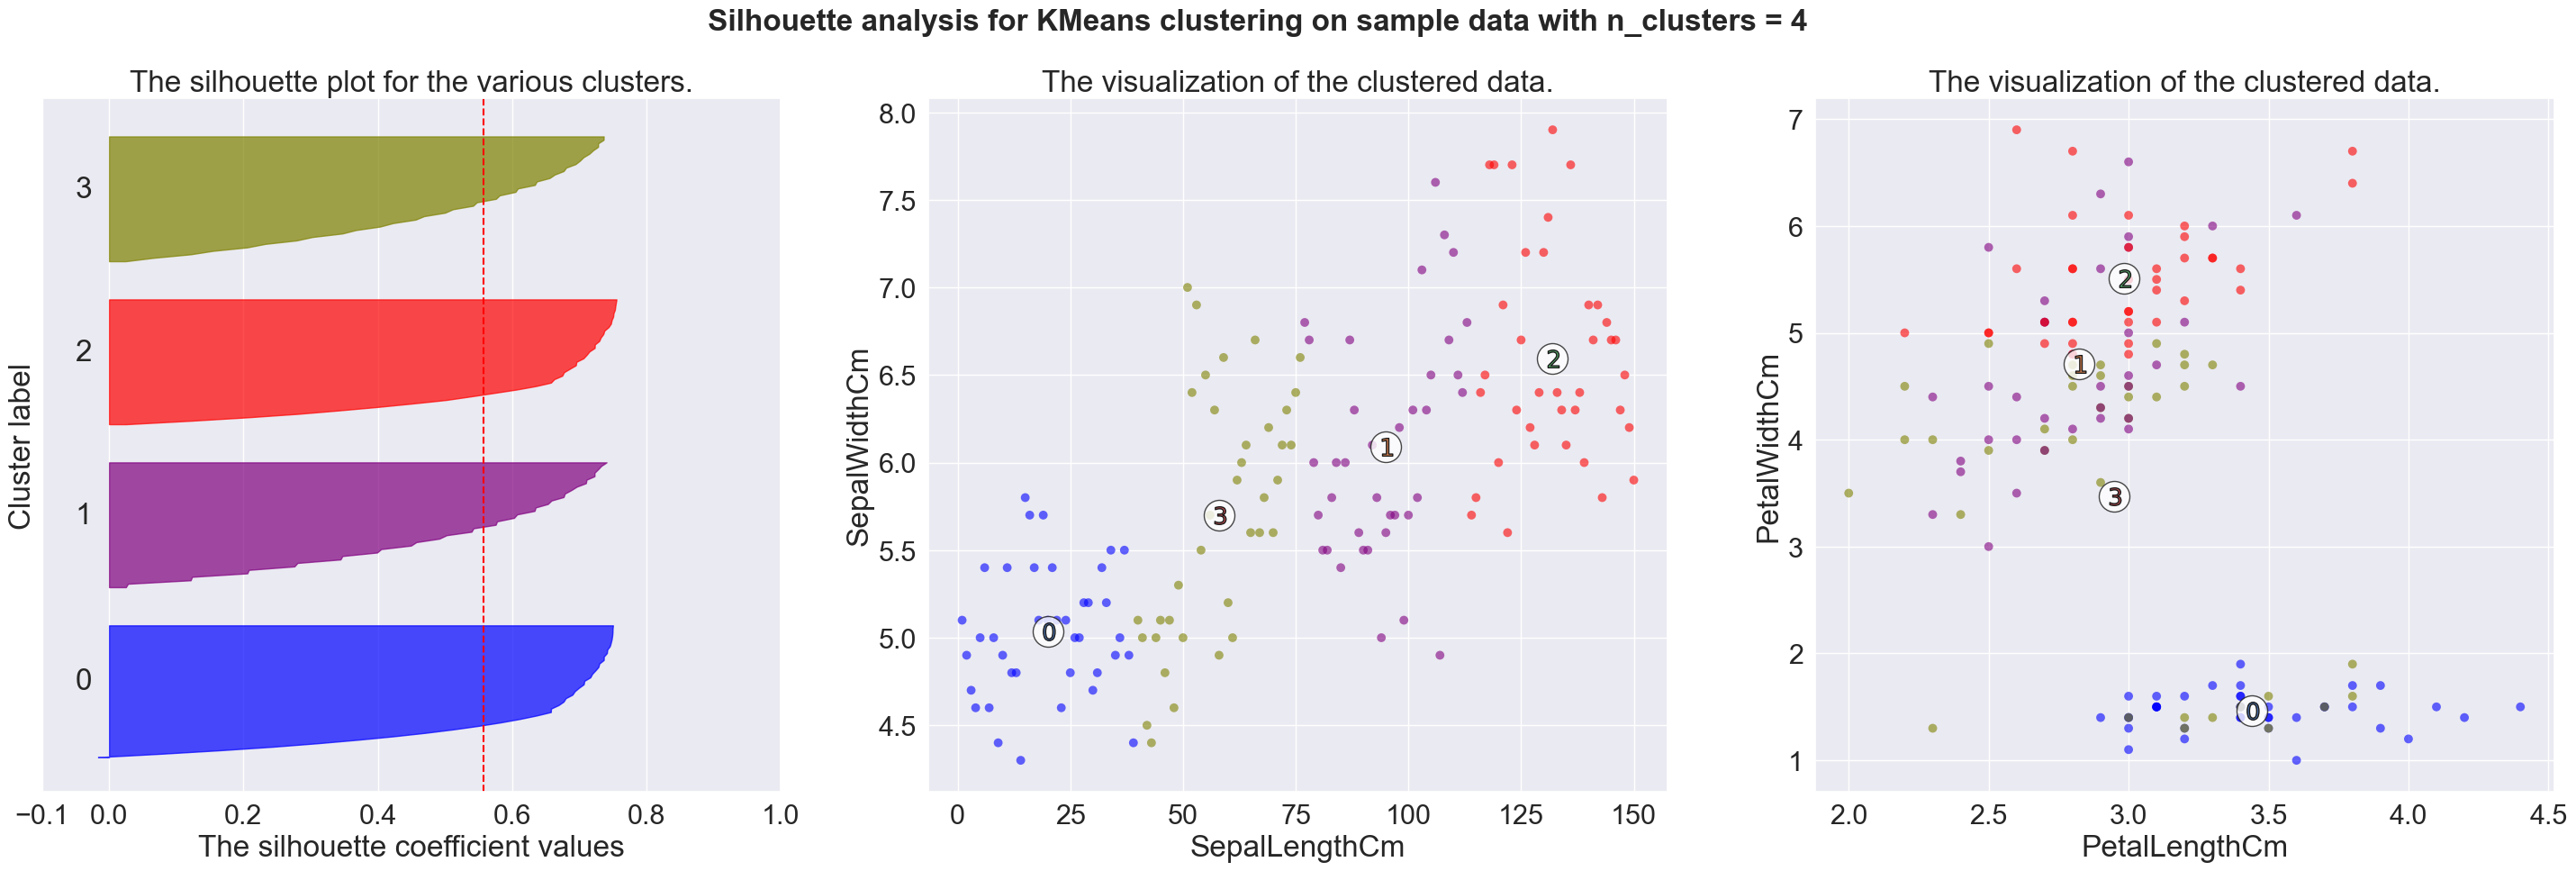

For n_clusters = 5 The average silhouette_score is : 0.5413279811844006


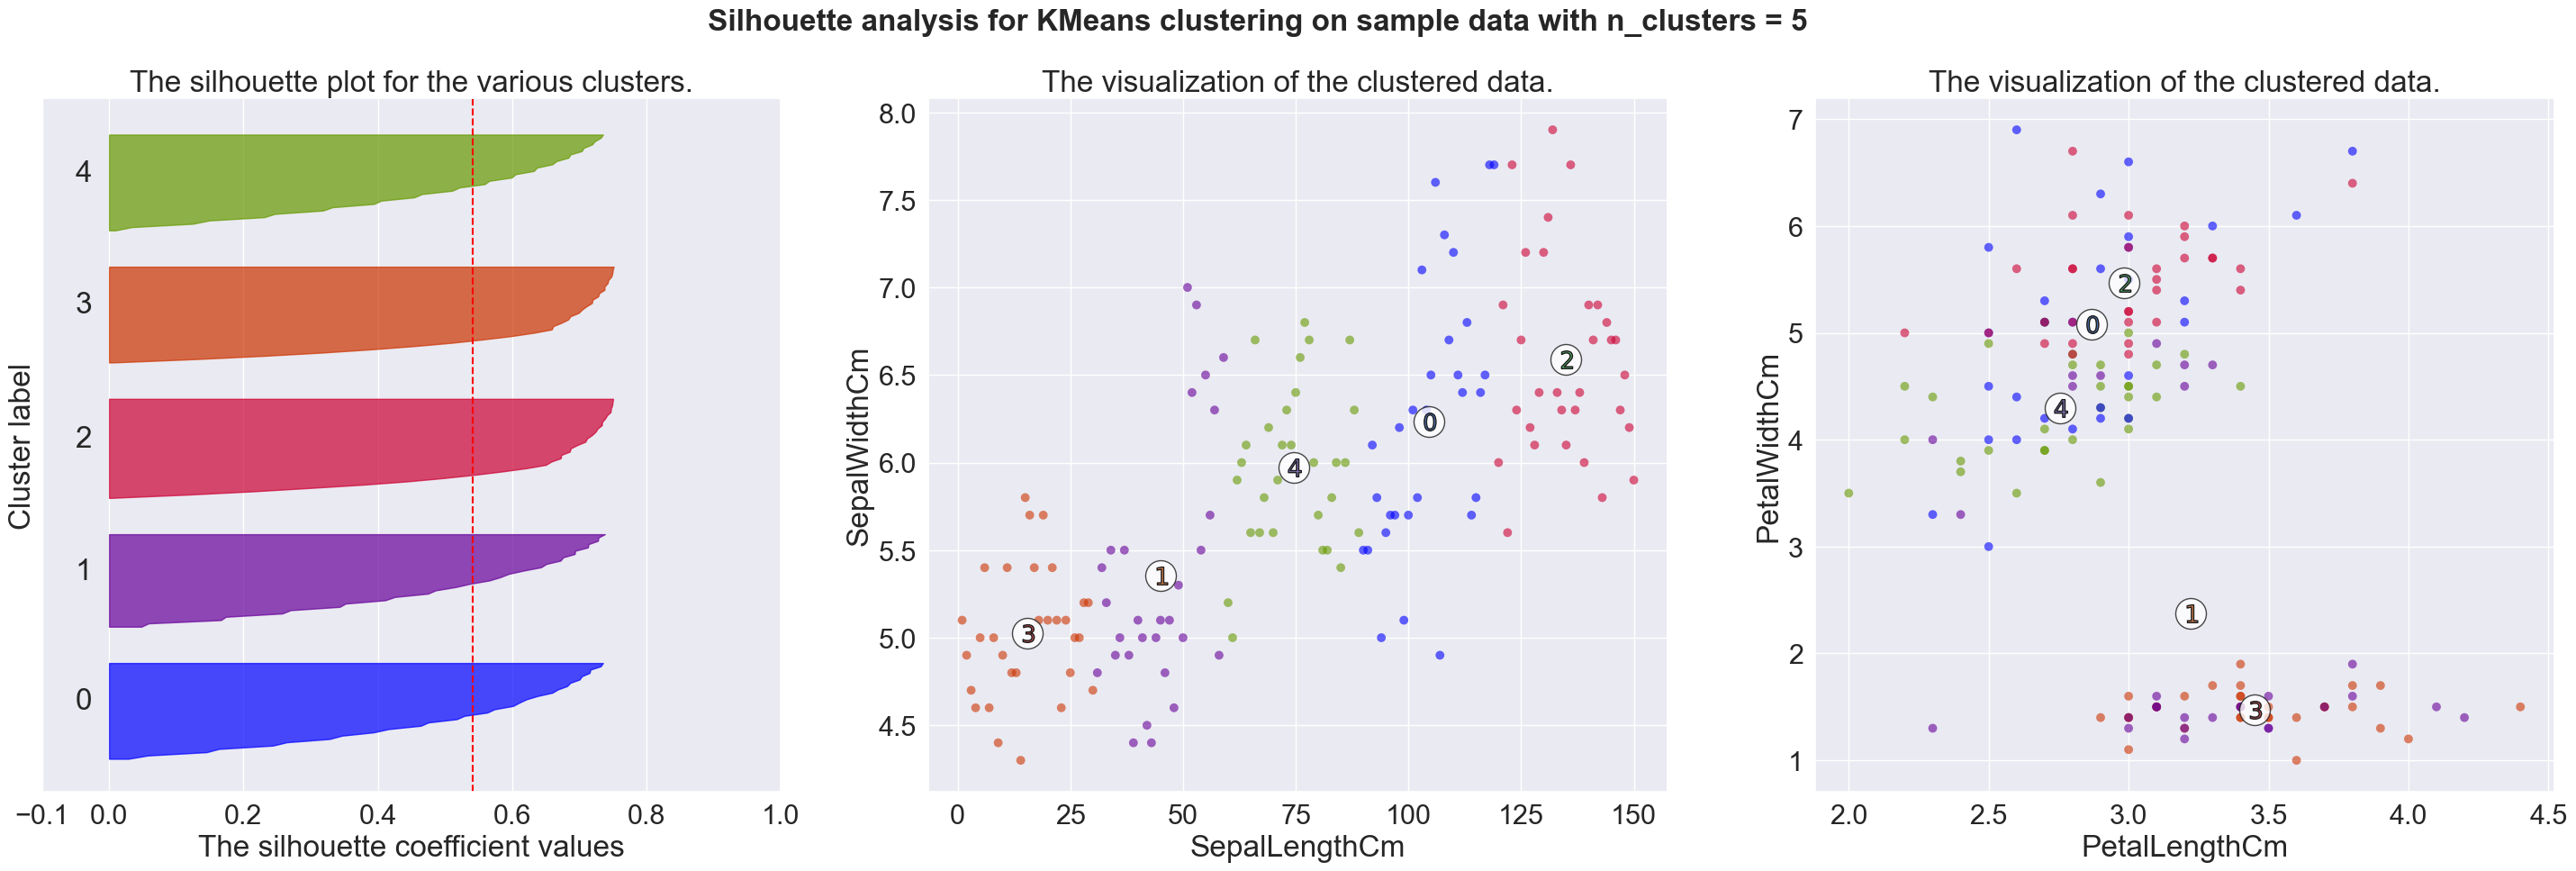

For n_clusters = 6 The average silhouette_score is : 0.5326542789877199


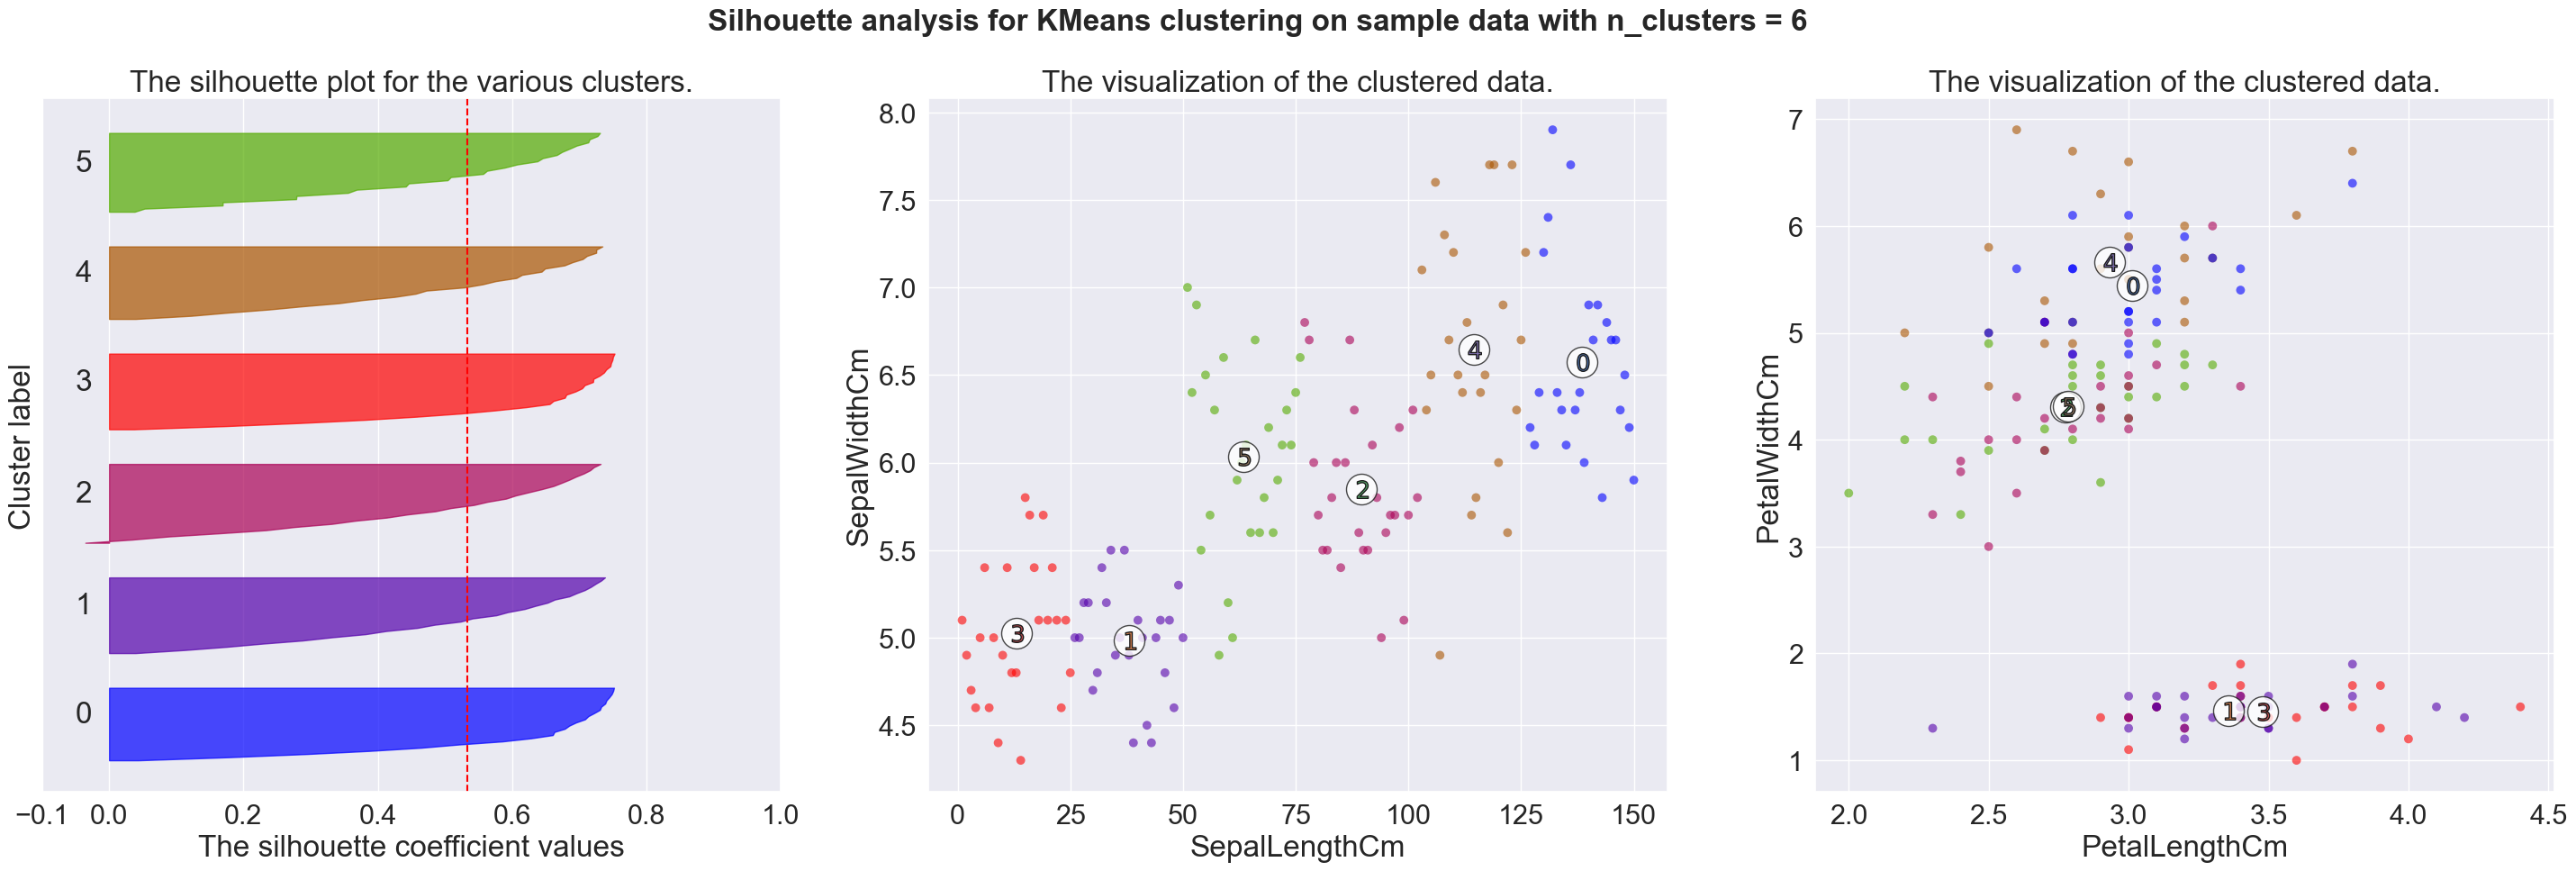

For n_clusters = 7 The average silhouette_score is : 0.5202585733530557


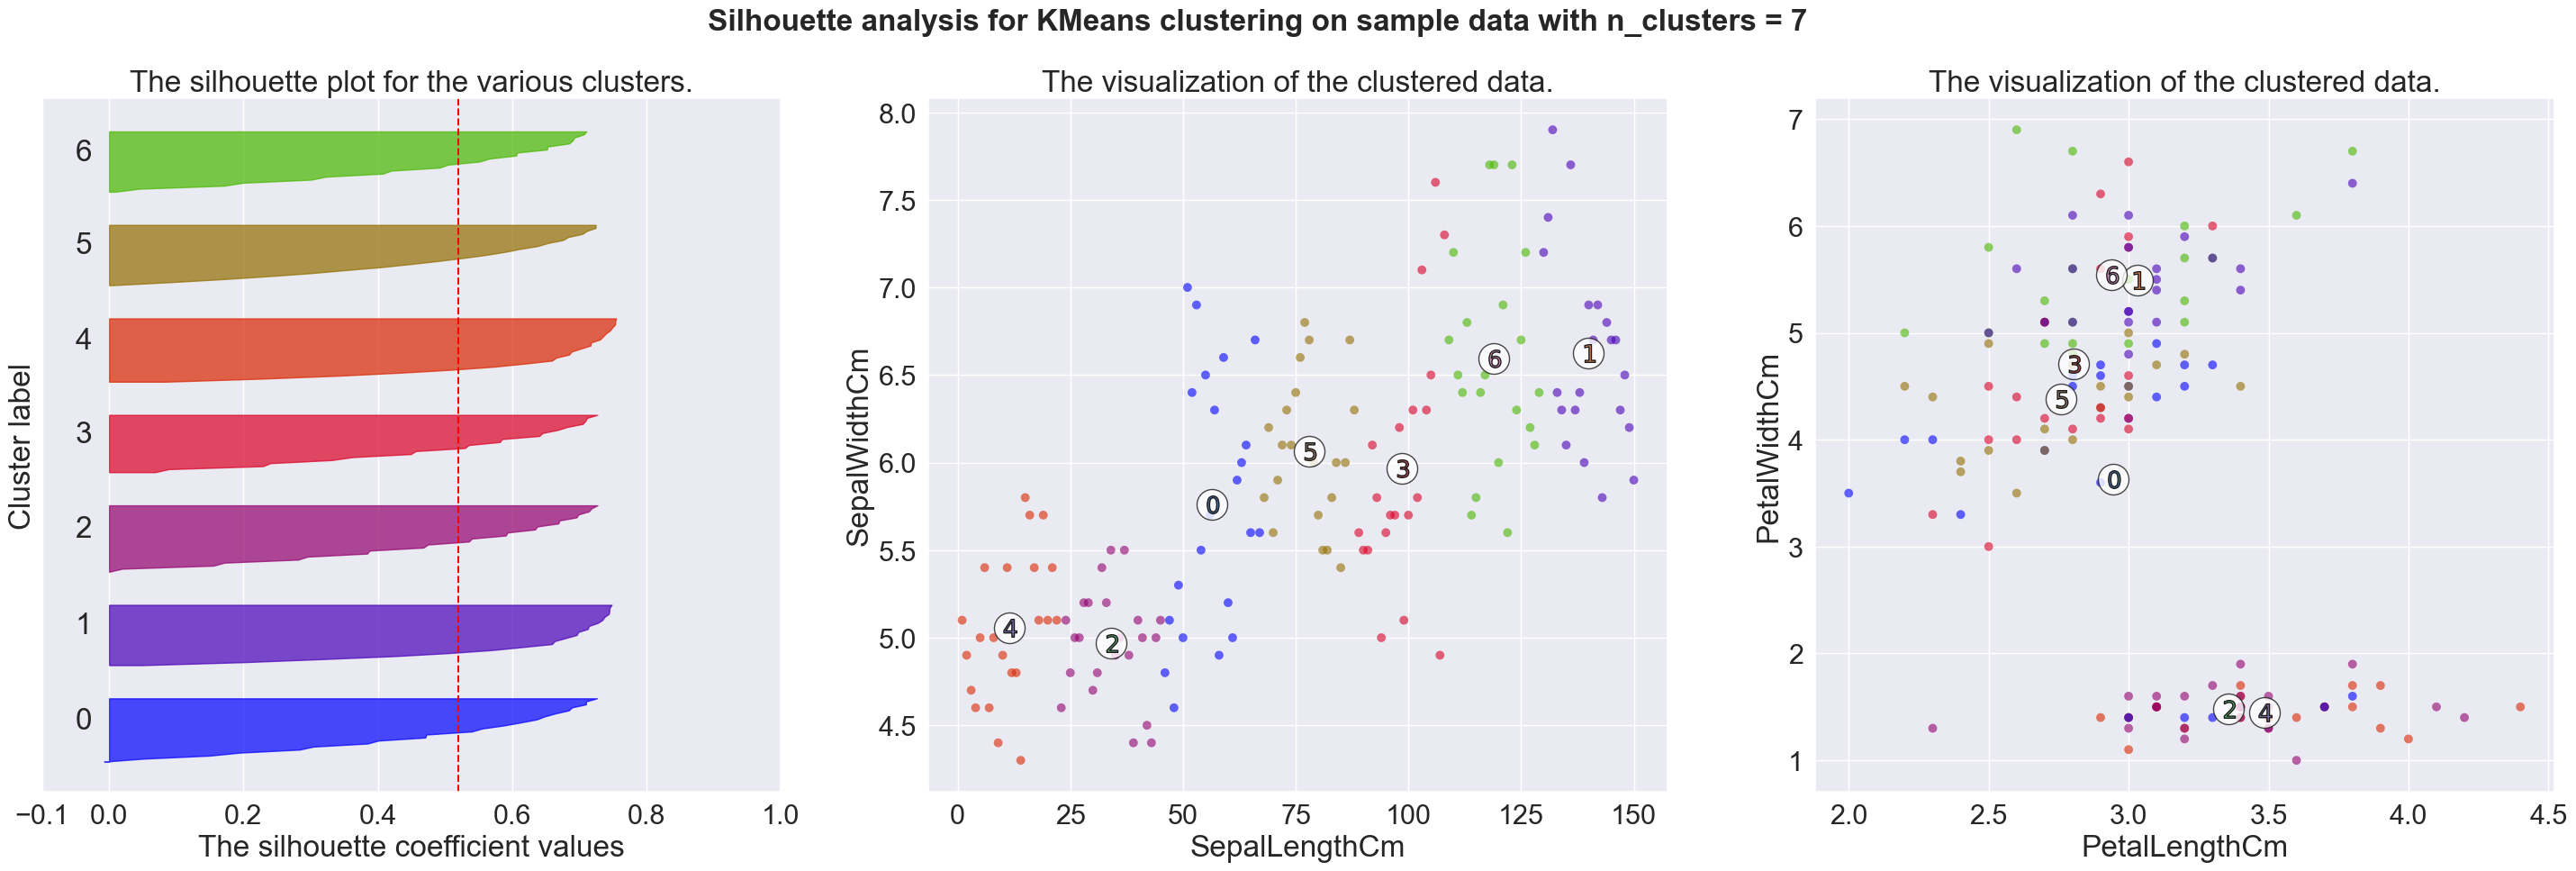

For n_clusters = 8 The average silhouette_score is : 0.5103261604895811


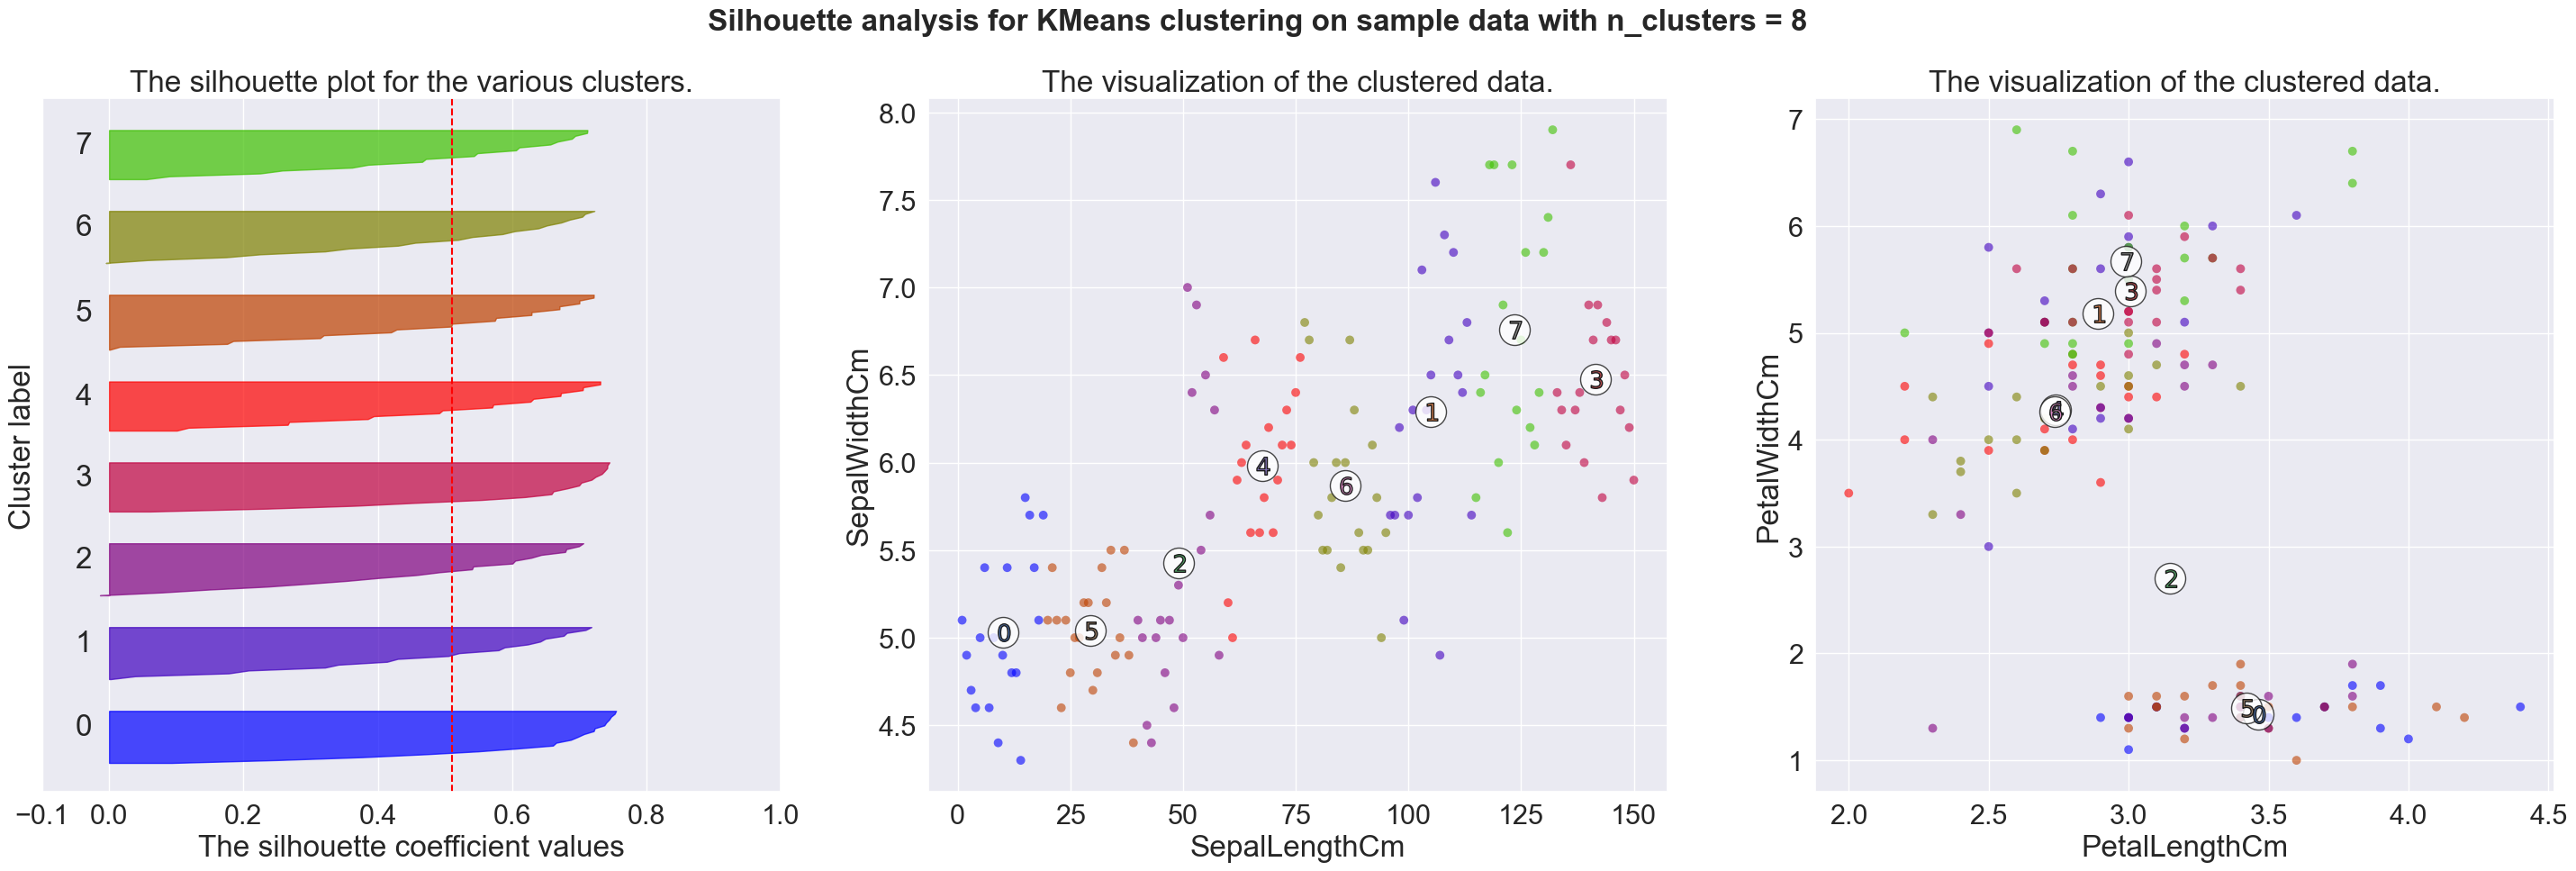

For n_clusters = 9 The average silhouette_score is : 0.5089667159671591


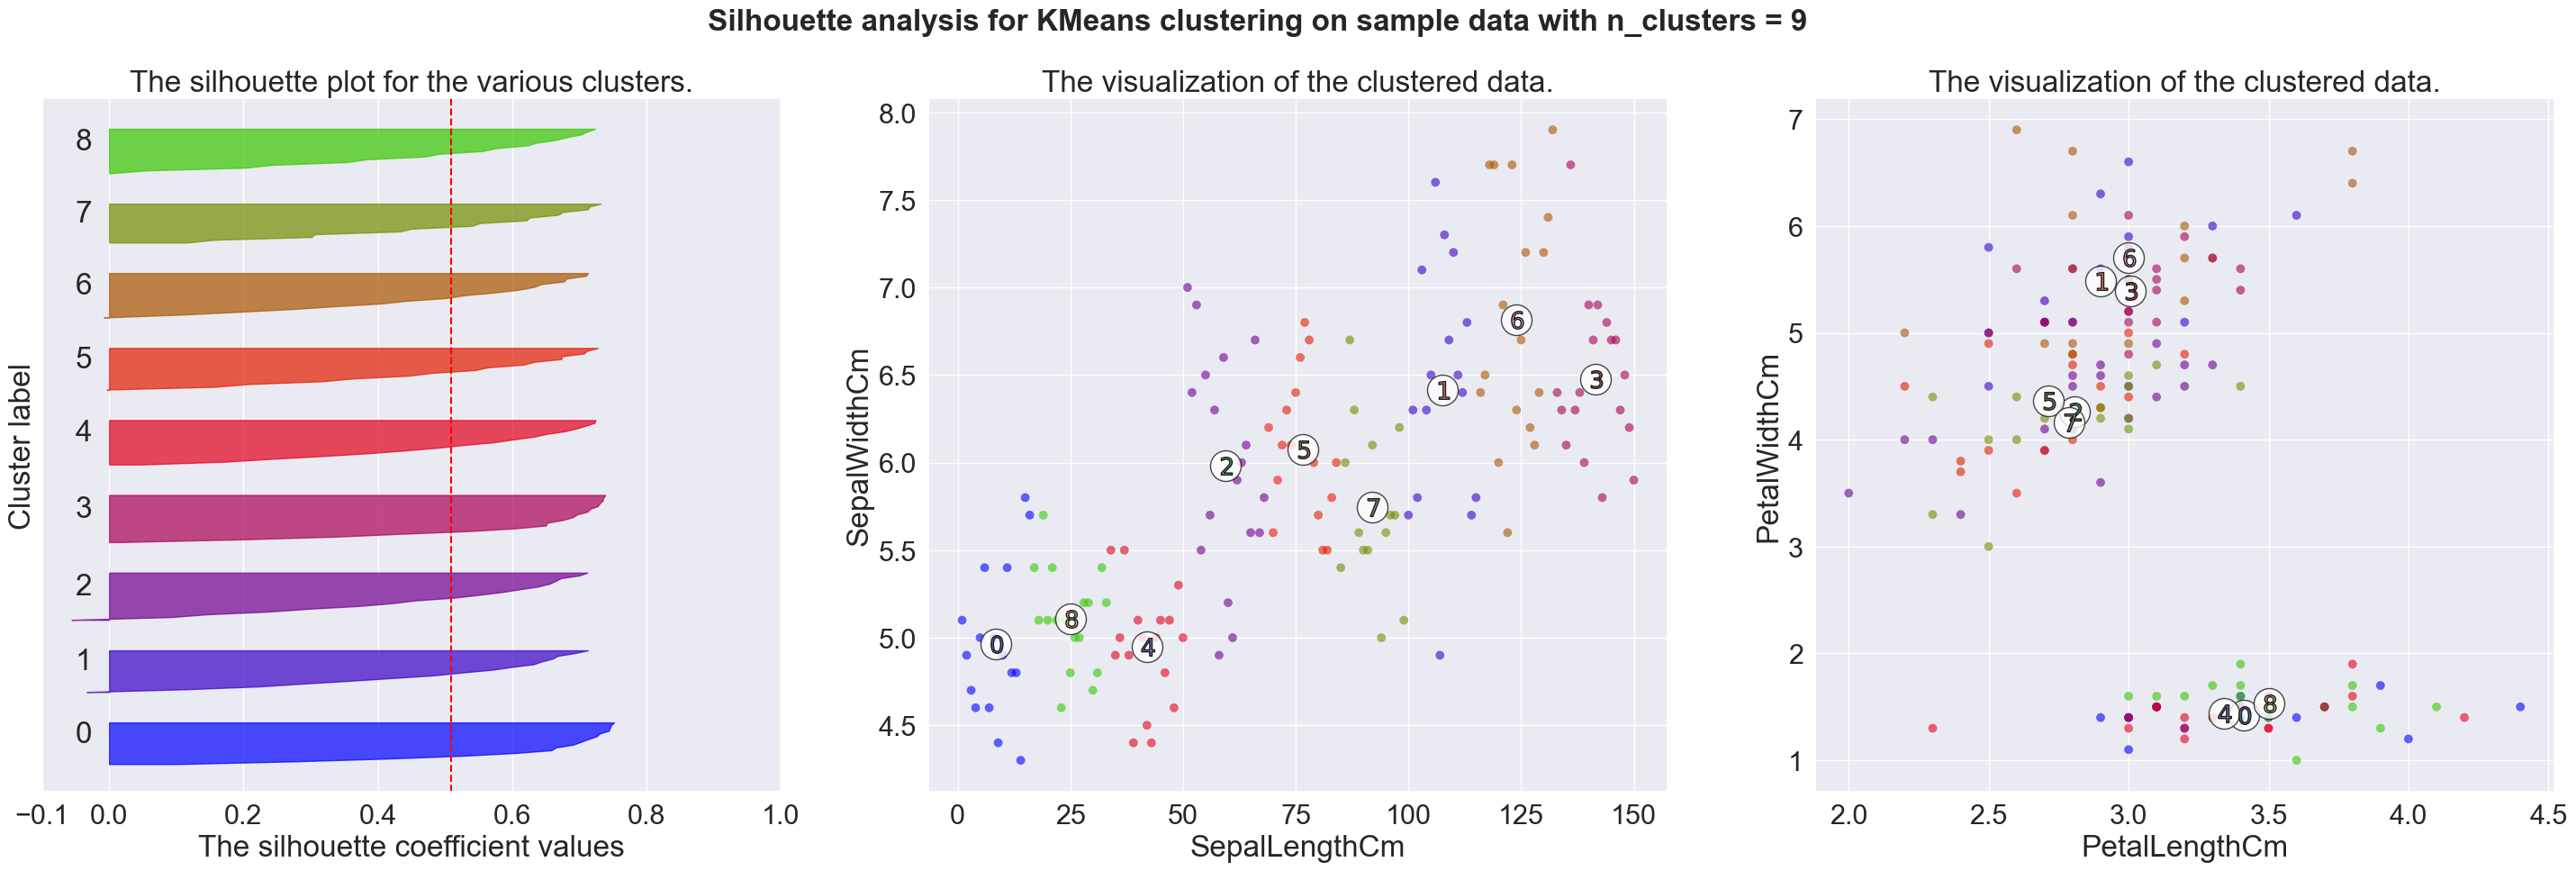

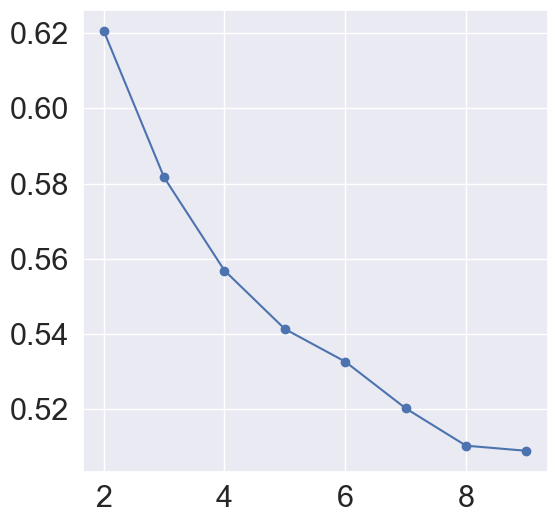

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score,  adjusted_mutual_info_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = donnees.iloc[:,0:4].values

cmap = cm.get_cmap("brg")
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

silhouettes = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(36, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouettes.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i       
        
        color = cmap(float(i) / n_clusters)
        #color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.",fontsize=24)
    ax1.set_xlabel("The silhouette coefficient values",fontsize=24)
    ax1.set_ylabel("Cluster label",fontsize=24)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters )
    attribut01,attribut02 = 0,1
    nomColonne = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

    ax2.scatter(X[:, attribut01], X[:, attribut02], marker='.', s=200, lw=0, alpha=0.6,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, attribut01], centers[:, attribut02], marker='o',
                c="white", alpha=.8, s=600, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[attribut01], c[attribut02], marker='$%d$' % i, alpha=1,
                    s=200, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.",fontsize=24)
    ax2.set_xlabel(nomColonne[attribut01],fontsize=24)
    ax2.set_ylabel(nomColonne[attribut02],fontsize=24)

    attribut01,attribut02 = 2,3    

    ax3.scatter(X[:, attribut01], X[:, attribut02], marker='.', s=200, lw=0, alpha=0.6,
                c=colors, edgecolor='k')

    # Draw white circles at cluster centers
    ax3.scatter(centers[:, attribut01], centers[:, attribut02], marker='o',
                c="white", alpha=.8, s=600, edgecolor='k')

    for i, c in enumerate(centers):
        ax3.scatter(c[attribut01], c[attribut02], marker='$%d$' % i, alpha=1,
                    s=200, edgecolor='k')

    ax3.set_title("The visualization of the clustered data.",fontsize=24)
    ax3.set_xlabel(nomColonne[attribut01],fontsize=24)
    ax3.set_ylabel(nomColonne[attribut02],fontsize=24)    

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=24, fontweight='bold')

    plt.show()
    
plt.figure(figsize=(6,6))
plt.plot(range_n_clusters,silhouettes,marker='o')
plt.show()